# Training Facial Expression Model-
This module trains a CNN model to classify a person's expression.

### dependencies
- python
- Keras
- Numpy
- Livelossplot

In [2]:
#importing libraries 
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Activation, Flatten, BatchNormalization, MaxPooling2D, Input, Lambda
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

from livelossplot import PlotLossesKerasTF
import numpy as np

In [3]:
#creating data generators for train and validation
img_size = 48
batch_size = 32
datagen_train = ImageDataGenerator(horizontal_flip=True, rotation_range=5)
train_generator = datagen_train.flow_from_directory("Data/train", target_size=(img_size, img_size),
                                                    color_mode="grayscale", batch_size=batch_size,
                                                    class_mode="categorical", shuffle=True)

datagen_val = ImageDataGenerator(horizontal_flip=True, rotation_range=5)
validation_generator = datagen_val.flow_from_directory("Data/test", target_size=(img_size, img_size),
                                                    color_mode="grayscale", batch_size=batch_size,
                                                    class_mode="categorical", shuffle=False)


Found 28702 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
i = Input(shape = (img_size, img_size, 1))
x = Lambda(lambda x: x/255.0) (i)
x = Conv2D(64, (3,3), padding='same') (x)
x = BatchNormalization() (x)
x = Activation('relu') (x)
x = MaxPooling2D(pool_size=(2,2)) (x)
x = Dropout(0.25) (x)

x = Conv2D(128, (5,5), padding='same') (x)
x = BatchNormalization() (x)
x = Activation('relu') (x)
x = MaxPooling2D(pool_size=(2,2)) (x)
x = Dropout(0.25) (x)

x = Conv2D(512, (5,5), padding='same') (x)
x = BatchNormalization() (x)
x = Activation('relu') (x)
x = MaxPooling2D(pool_size=(2,2)) (x)
x = Dropout(0.25) (x)

x = Conv2D(512, (3,3), padding='same') (x)
x = BatchNormalization() (x)
x = Activation('relu') (x)
x = MaxPooling2D(pool_size=(2,2)) (x)
x = Dropout(0.25) (x)

x = Conv2D(1024, (3,3), padding='same') (x)
x = BatchNormalization() (x)
x = Activation('relu') (x)
x = MaxPooling2D(pool_size=(2,2)) (x)
x = Dropout(0.25) (x)

x = Flatten() (x)

x = Dense(512) (x)
x = BatchNormalization() (x)
x = Activation('relu') (x)
x = Dropout(0.25) (x)

x = Dense(128) (x)
x = BatchNormalization() (x)
x = Activation('relu') (x)
x = Dropout(0.25) (x)

x = Dense(64) (x)
x = BatchNormalization() (x)
x = Activation('relu') (x)
x = Dropout(0.25) (x)

x = Dense(7, activation='softmax') (x)
	
model = Model(i, x)
	
model.compile(optimizer=Adam(0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
lambda (Lambda)              (None, 48, 48, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0     

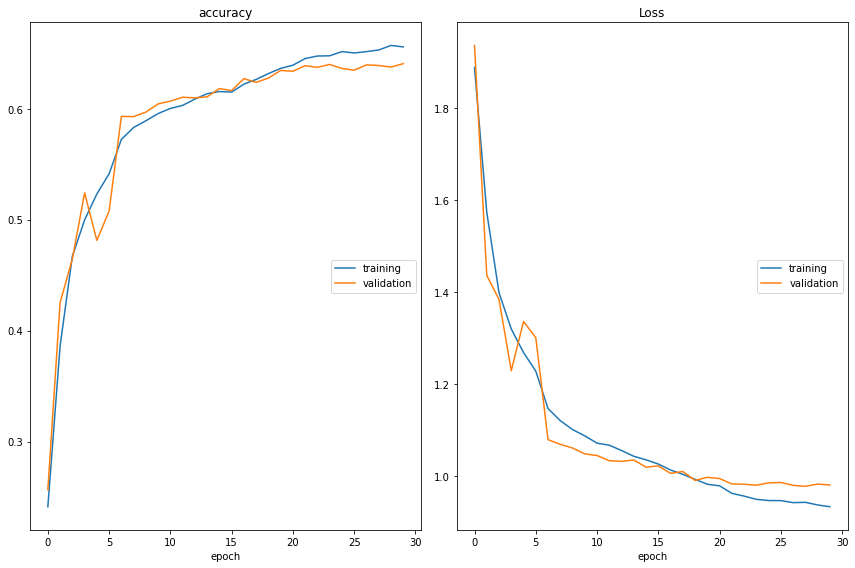

accuracy
	training         	 (min:    0.241, max:    0.657, cur:    0.656)
	validation       	 (min:    0.257, max:    0.641, cur:    0.641)
Loss
	training         	 (min:    0.934, max:    1.888, cur:    0.934)
	validation       	 (min:    0.978, max:    1.936, cur:    0.981)

Epoch 00030: saving model to model_weights.h5


In [5]:
epochs = 30
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

In [6]:
model.save("model.h5")